In [1]:
import numpy as np

In [14]:
import scipy.stats
inverse_cdf = scipy.stats.norm.ppf
cdf = scipy.stats.norm.cdf

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2.0)

# Multivariate normal PDF

$$
\text{MVNormalPDF}(x | \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}} \frac{1}{\text{det}(\Sigma)^{1/2}} \exp{-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) }
$$

# Plot the contours of the PDF in 2D space

In [47]:

def plotGauss2DContour(
        mu_D, cov_DD,
        color='b',
        prob_mass_inside_contour_grid=[0.25, 0.75, 0.99],
        markersize=3.0,
        unit_circle_radian_step_size=0.03,
        ax_handle=None,
        ):
    ''' Plot elliptical contours for provided mean mu, covariance Sigma.
    
    Args
    ----
    mu_D : 1D numpy array, shape (D,) = (2,)
        Must be a 2-d mean vector
    cov_DD : 2D numpy array, shape (D,D) = (2,2)
        Must be a 2x2 symmetric, positive definite covariance
    prob_mass_inside_contour_grid : list
        How much probability mass should lie inside each contour

    Post Condition
    --------------
    Plot created on current axes (or the provided axis)
    '''
    # If user provided an axis, use that
    if ax_handle is not None:
        plt.sca(ax_handle)

    mu_D = np.squeeze(np.asarray(mu_D))
    cov_DD = np.asarray(cov_DD)
    assert mu_D.shape == (2,)
    assert cov_DD.shape == (2,2)
    
    # Decompose cov matrix into eigenvalues "lambda[d]" and eigenvectors "V[:,d]"
    lambda_D, V_DD = np.linalg.eig(cov_DD)
    sqrtCov_DD = np.dot(V_DD, np.sqrt(np.diag(lambda_D)))

    # Prep for plotting elliptical contours
    # by creating grid of G different (x,y) points along perfect circle
    t_G = np.arange(-np.pi, np.pi, unit_circle_radian_step_size)
    x_G = np.sin(t_G)
    y_G = np.cos(t_G)
    Zcirc_DG = np.vstack([x_G, y_G])

    # Warp circle into ellipse defined by Sigma's eigenvectors
    Zellipse_DG = np.dot(sqrtCov_DD, Zcirc_DG)

    # Plot contour lines across several radius lengths
    for prob_mass in sorted(prob_mass_inside_contour_grid):
        # How large is the radius r?
        # Need to set r such that area from (-r, r) for 1D Gaussian equals p
        # Equivalently by symmetry we set:  2 * ( CDF(r) - CDF(0) ) = p
        r = inverse_cdf(prob_mass/2 + cdf(0))
        
        Z_DG = r * Zellipse_DG + mu_D[:, np.newaxis]
        plt.plot(
            Z_DG[0], Z_DG[1], '.',
            markersize=markersize,
            markerfacecolor=color,
            markeredgecolor=color)


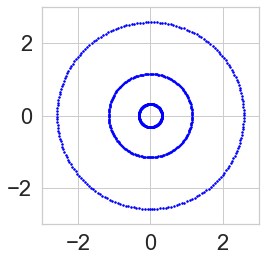

In [48]:
plotGauss2DContour([0,0], np.eye(2))
plt.gca().set_aspect('equal', 'box');
plt.gca().set_xlim([-3, 3]);
plt.gca().set_ylim([-3, 3]);

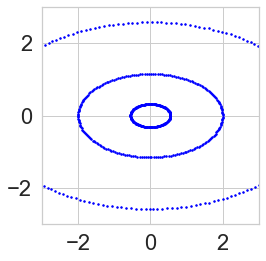

In [53]:
plotGauss2DContour([0,0], np.asarray([[3, 0], [0, 1]]))
plt.gca().set_aspect('equal', 'box');
plt.gca().set_xlim([-3, 3]);
plt.gca().set_ylim([-3, 3]);

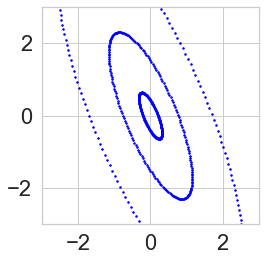

In [54]:
plotGauss2DContour([0,0], np.asarray([[1, -1.5], [-1.5, 4]]))
plt.gca().set_aspect('equal', 'box');
plt.gca().set_xlim([-3, 3]);
plt.gca().set_ylim([-3, 3]);